### Task 2 - k-means Clustering

In [1]:
# Required imports
import pandas as pd
import numpy as np
import scipy as sp
from scipy.cluster.vq import kmeans,vq
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import os

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
# Reading the data
filename = "data_avshirod.csv"
dir_path = os.getcwd()
plt_path = dir_path + "/plots"
data = pd.read_csv(filename, header=None)

In [3]:
# Task 2 - k-means clustering
def k_means(k):
    centroids,diff = kmeans(data,k)
    idx,_ = vq(data,centroids)
    return centroids, diff, idx

# Apply the algorithm for two clusters. 
centroids_2, diff_2, idx_2 = k_means(2)

For K-Means clustering, we are using **`kmeans`** method from *scipy.cluster.vq*. (vq stands for Vector Quantization.)

The method returns the centroids it found, and also the average distortion from centroids.

In [4]:
centroids_km, diff_km, idx_km = [], [], []
for k in range(2,36):
    c,d,i = k_means(k)
    centroids_km.append(c)
    diff_km.append(d)
    idx_km.append(i)

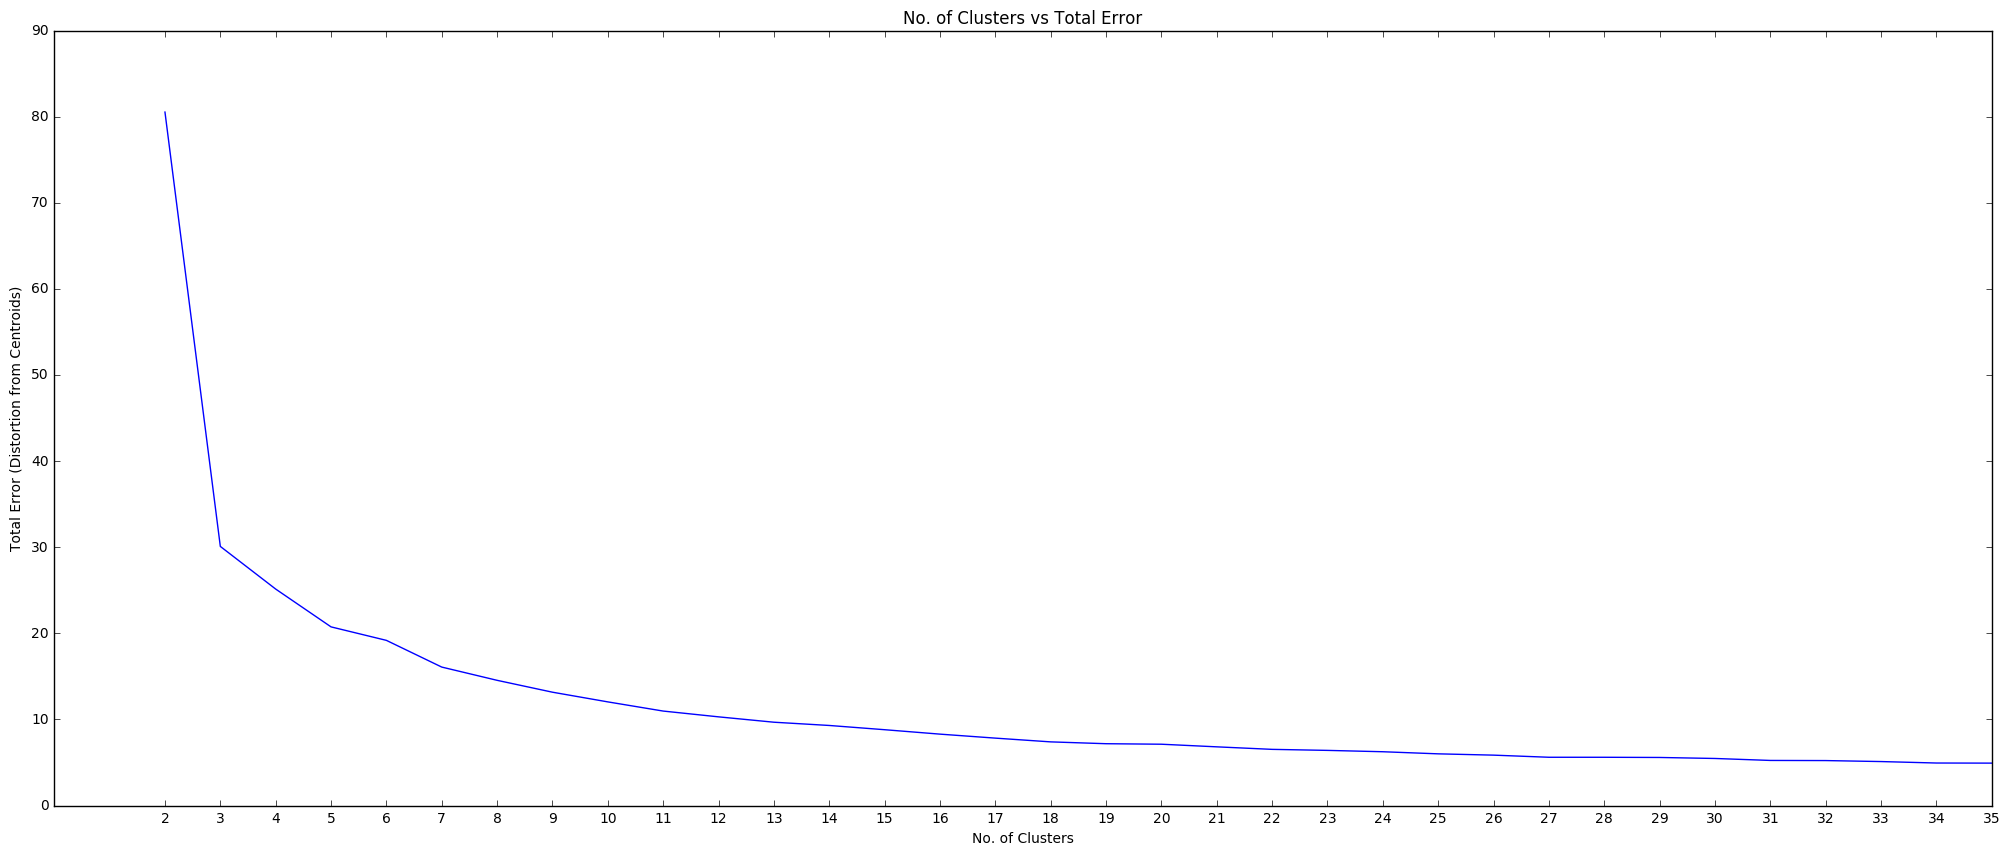

In [5]:
# rcParams.update({'font.size': 16})
plt.figure(figsize = (25,10))
plt.title("No. of Clusters vs Total Error")
plt.plot(range(2,36), diff_km)
plt.xticks(range(2,36))
plt.xlabel("No. of Clusters")
plt.ylabel("Total Error (Distortion from Centroids)")
plt.savefig(plt_path + "/t2_knee")
plt.show()

In [6]:
# print(diff_km)
print(diff_km[2-1])

30.0880383487


After running k-means for values in range of 2 to 36, we plot the number of clusters aganist the error in each case.
The error is the distortion between the observed values and the generated centroids.

From the plot above, we can see that the **elbow** occurs at **k=3**.
After that, it keeps on decreasing gradually.

Hence, we identify the value of *k=3*. There are three clusters in the dataset, and when plotted in different colors, they look like plot below.

<IPython.core.display.Javascript object>


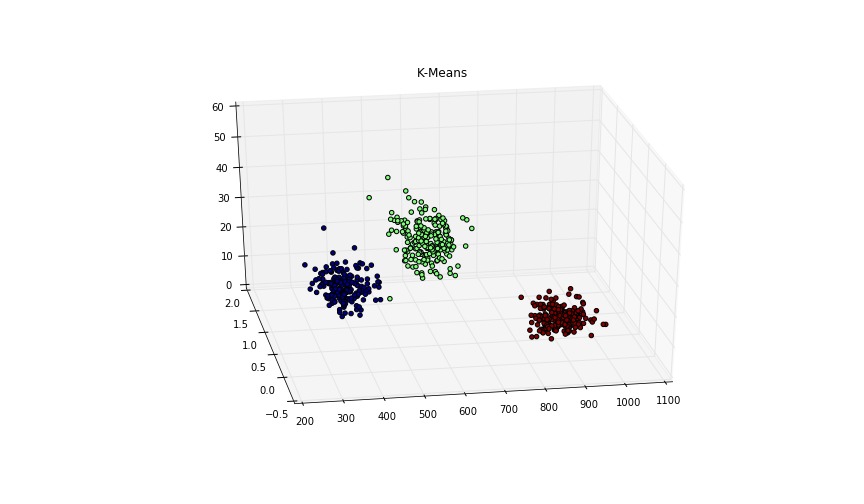

In [9]:
%matplotlib notebook
# Color the data according to their cluster, and do a 3D scatter diagram. Rotate the diagram to identify the clusters.
# fig = plt.figure(figsize=(15, 10))
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2], c=idx_km[1], depthshade=False)
ax.view_init(elev=30, azim=260)
ax.set_title("K-Means")
fig.savefig(plt_path + "/t2_scatter")

In [8]:
# print(idx_km[1])
# print("Sil_Score for K Means = %r " % (silhouette_score(data, idx_km[1], metric='euclidean')))